In [1]:
# -*- coding: utf-8 -*-
"""
@Author: Guan-Fu Liu
Created on Oct. 5, 2023
Last modified on Oct. 5, 2023

To create sencondary axes in matplotlib.
"""
import matplotlib.pyplot as plt
import numpy as np
from astropy import constants as const
import pandas as pd
%matplotlib widget

To reproduce Fig. 11 in *Radiative Processes in Astrophysics*, by George B. Rybicki, Alan P. Lightman, pp. 400. ISBN 0-471-82759-2. Wiley-VCH , June 1986.

![Alt text](Fig11.png)

In [2]:
# All the constants are in cgs units.
h = const.h.cgs.value
c = const.c.cgs.value
kB = const.k_B.cgs.value

In [3]:
def nu_to_lambda(nu):
    """
    Convert frequency to wavelength.

    Parameters
    ----------
    nu : float
        Frequency in Hz.
    """
    return c/nu

def lambda_to_nu(lam):
    """
    Convert wavelength to frequency.

    Parameters
    ----------
    lam : float
        Wavelength in cm.
    """
    return c/lam

def B_nu_to_B_lambda(B_nu, nu):
    """
    Convert specific intensity from B_nu to B_lambda.

    Parameters
    ----------
    B_nu : float
        Specific intensity in B_nu.
    nu : float
        Frequency in Hz.
    """
    return B_nu*nu**2/c

In [4]:
Ts = np.logspace(1, 8, 8)
T_indices = ['lg(T/K)=%d'%a for a in range(1, 9)]
df = pd.DataFrame(columns=['nu', 'lambda', 'B_nu', 'B_lambda'], index=T_indices)
for i in range(len(Ts)):
    T = Ts[i]
    alpha = np.log10(T) + 1
    nu = np.logspace(9.0-0.9*alpha, 11.5+1*alpha, 1000)
    B_nu = 2*h*nu**3/c**2/(np.exp(h*nu/kB/T)-1)
    B_lambda = B_nu*nu**2/c
    lambda1 = c/nu
    df.iloc[i] = [nu, lambda1, B_nu, B_lambda]

/var/folders/n1/b2jlktb513s_p91lxgjjcm440000gn/T/ipykernel_7192/643831770.py:8: RuntimeWarning: divide by zero encountered in divide
  B_nu = 2*h*nu**3/c**2/(np.exp(h*nu/kB/T)-1)


In [5]:
# Pre-defined line styles for plotting.
linestyles = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

/var/folders/n1/b2jlktb513s_p91lxgjjcm440000gn/T/ipykernel_7192/3722607148.py:21: RuntimeWarning: divide by zero encountered in divide
  return c/lam


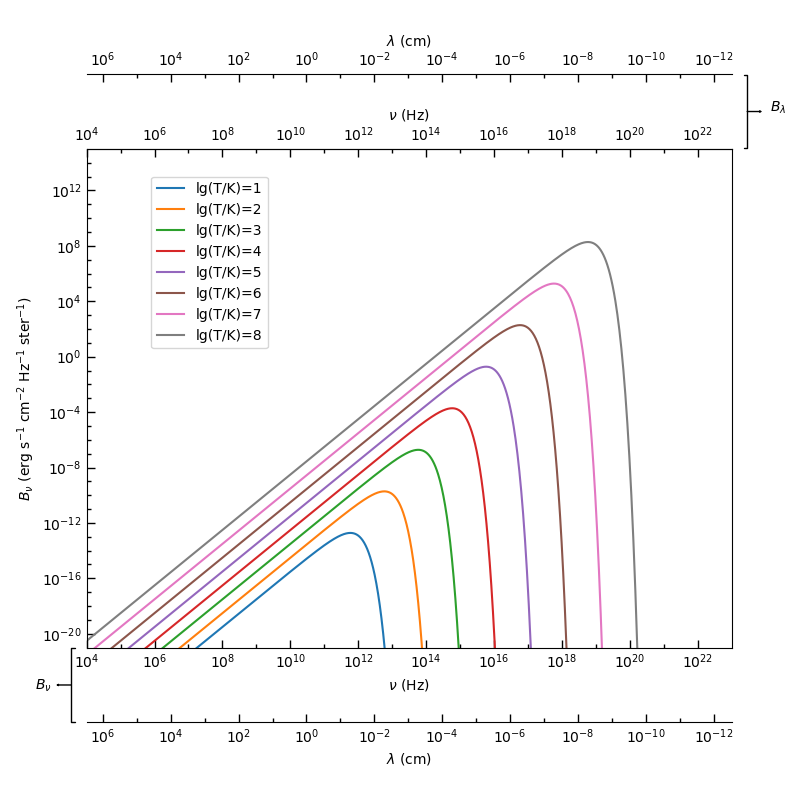

/var/folders/n1/b2jlktb513s_p91lxgjjcm440000gn/T/ipykernel_7192/3722607148.py:21: RuntimeWarning: divide by zero encountered in divide
  return c/lam


In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.loglog()

for index, row in df.iterrows():
    ax.plot(row['nu'], row['B_nu'], label=index)

# Set x and y limits
ax.set_xlim(1e4, 1e23)
ax.set_ylim(1e-21, 1e15)

# Set x major ticks
major_xticks = np.logspace(4, 22, 10)
ax.set_xticks(major_xticks, minor=False)
# If all the x or y major ticks are something like "1e5", "1e6", "1e7" etc.,
# you may not need to set the x major tick labels.
# Matplotlib will automatically set the x major tick labels as "$\\mathdefault{10^{5}}$",
# "$\\mathdefault{10^{6}}$", "$\\mathdefault{10^{6}}$" etc.
# Set x minor ticks
minor_xticks = np.logspace(5, 21, 9)
ax.set_xticks(minor_xticks, minor=True)
# Set x minor tick labels
ax.set_xticklabels([' ']*len(minor_xticks), minor=True)
# Set tick parameters
ax.tick_params(axis='x', direction='in',which='major', length=6, width=1.0)
ax.tick_params(axis='x', direction='in',which='minor', length=3, width=1.0)

# Set y major ticks
major_yticks = np.logspace(-20, 12, 9)
ax.set_yticks(major_yticks, minor=False)
# Set y minor ticks
minor_yticks = np.logspace(-20, 14, 35)
ax.set_yticks(minor_yticks, minor=True)
# Set y minor tick labels
ax.set_yticklabels(['']*len(minor_yticks), minor=True)
# Set tick parameters
ax.tick_params(axis='y', direction='in',which='major', length=6, width=1.0)
ax.tick_params(axis='y', direction='in',which='minor', length=3, width=1.0)

# Set x and y labels
ax.set_xlabel(r'$\nu$ (Hz)')
ax.set_ylabel(r'$B_\nu$ (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$ ster$^{-1}$)')

# Set secondary x axis on the top
secax1 = ax.secondary_xaxis(location='top', functions=(lambda x: x, lambda x: x))
# Set secondary x axis ticks and labels
secax1.set_xticks(ax.get_xticks(minor=False), minor=False)
secax1.set_xticklabels(ax.get_xticklabels(minor=False), minor=False)
secax1.set_xticks(ax.get_xticks(minor=True), minor=True)
secax1.set_xticklabels(ax.get_xticklabels(minor=True), minor=True)
secax1.set_xlabel(ax.get_xlabel())
# Set tick parameters
secax1.tick_params(axis='x', direction='in',which='major', length=6, width=1.0)
secax1.tick_params(axis='x', direction='in',which='minor', length=3, width=1.0)

# Set secondary x axis on the top, but in the unit of wavelength
secax2 = ax.secondary_xaxis(location=1.15, functions=(nu_to_lambda, lambda_to_nu))
# Set secondary x axis ticks and labels
major_xticks2 = np.logspace(6, -12, 10)
secax2.set_xticks(major_xticks2, minor=False)
minor_xticks2 = np.logspace(5, -11, 9)
secax2.set_xticks(minor_xticks2, minor=True)
secax2.set_xticklabels(['']*len(minor_xticks2), minor=True)
secax2.set_xlabel(r'$\lambda$ (cm)')
# Set tick parameters
secax2.tick_params(axis='x', direction='in',which='major', length=6, width=1.0)
secax2.tick_params(axis='x', direction='in',which='minor', length=3, width=1.0)
# Set secondary x axis limits
secax2.set_xlim(secax1.get_xlim())


# Set secondary x axis on the top, but in the unit of wavelength
secax3 = ax.secondary_xaxis(location=-0.15, functions=(nu_to_lambda, lambda_to_nu))
# Set secondary x axis ticks and labels
major_xticks3 = np.logspace(6, -12, 10)
secax3.set_xticks(major_xticks3, minor=False)
minor_xticks3 = np.logspace(5, -11, 9)
secax3.set_xticks(minor_xticks3, minor=True)
secax3.set_xticklabels(['']*len(minor_xticks3), minor=True)
secax3.set_xlabel(r'$\lambda$ (cm)')
# Set tick parameters
secax3.tick_params(axis='x', direction='in',which='major', length=6, width=1.0)
secax3.tick_params(axis='x', direction='in',which='minor', length=3, width=1.0)
# Set secondary x axis limits
secax3.set_xlim(secax1.get_xlim())

# Add annotation
ax.annotate('', xytext=(1.02, 1.075), xy=(1.05, 1.075), xycoords='axes fraction',  
            arrowprops=dict(arrowstyle="]->, widthA=12, lengthA=1.2", color='black', mutation_scale=2.2, 
                            connectionstyle="arc3", lw=1.0, mutation_aspect=1, shrinkB=1))
ax.annotate(r'$B_{\lambda}$', xytext=(1.06, 1.075), xy=(1.09, 1.075), xycoords='axes fraction')

ax.annotate('', xytext=(-0.02, -0.075), xy=(-0.05, -0.075), xycoords='axes fraction',  
            arrowprops=dict(arrowstyle="]->, widthA=12, lengthA=1.2", color='black', mutation_scale=2.2, 
                            connectionstyle="arc3", lw=1.0, mutation_aspect=1, shrinkB=1))
ax.annotate(r'$B_{\nu}$', xytext=(-0.08, -0.085), xy=(-0.06, -0.085), xycoords='axes fraction')

ax.legend(loc=(0.1, 0.6))
fig.tight_layout()
fig.savefig('Bnu.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/n1/b2jlktb513s_p91lxgjjcm440000gn/T/ipykernel_7192/3722607148.py:10: RuntimeWarning: divide by zero encountered in divide
  return c/nu


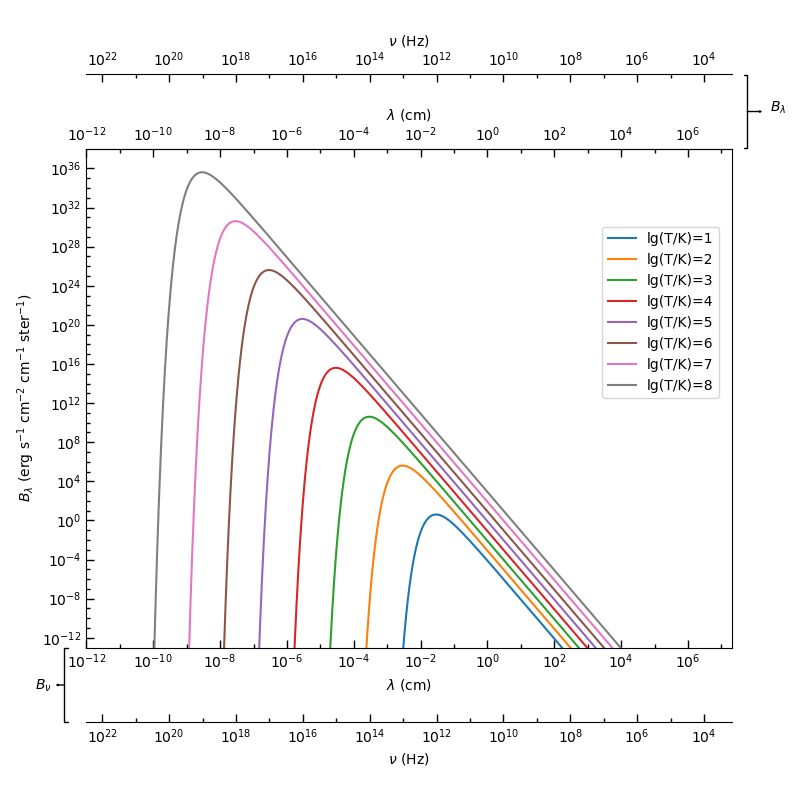

/var/folders/n1/b2jlktb513s_p91lxgjjcm440000gn/T/ipykernel_7192/3722607148.py:10: RuntimeWarning: divide by zero encountered in divide
  return c/nu


In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.loglog()

for index, row in df.iterrows():
    ax.plot(row['lambda'], row['B_lambda'], label=index)

ax.set_xlim(1e-12, 2e7)
ax.set_ylim(1e-13, 1e38)

# Set x major ticks
major_xticks = np.logspace(-12, 6, 10)
ax.set_xticks(major_xticks, minor=False)
# Set x minor ticks
minor_xticks = np.logspace(-11, 7, 10)
ax.set_xticks(minor_xticks, minor=True)
# Set x minor tick labels
ax.set_xticklabels([' ']*len(minor_xticks), minor=True)
# Set tick parameters
ax.tick_params(axis='x', direction='in',which='major', length=6, width=1.0)
ax.tick_params(axis='x', direction='in',which='minor', length=3, width=1.0)

# Set y major ticks
major_yticks = np.logspace(-12, 36, 13)
ax.set_yticks(major_yticks, minor=False)
# Set y minor ticks
minor_yticks = np.logspace(-12, 36, 49)
ax.set_yticks(minor_yticks, minor=True)
# Set y minor tick labels
ax.set_yticklabels(['']*len(minor_yticks), minor=True)
# Set tick parameters
ax.tick_params(axis='y', direction='in',which='major', length=6, width=1.0)
ax.tick_params(axis='y', direction='in',which='minor', length=3, width=1.0)

# Set x and y labels
ax.set_xlabel(r'$\lambda$ (cm)')
ax.set_ylabel(r'$B_\lambda$ (erg s$^{-1}$ cm$^{-2}$ cm$^{-1}$ ster$^{-1}$)')

# Set secondary x axis on the top
secax1 = ax.secondary_xaxis(location='top', functions=(lambda x: x, lambda x: x))
# Set secondary x axis ticks and labels
secax1.set_xticks(ax.get_xticks(minor=False), minor=False)
secax1.set_xticklabels(ax.get_xticklabels(minor=False), minor=False)
secax1.set_xticks(ax.get_xticks(minor=True), minor=True)
secax1.set_xticklabels(ax.get_xticklabels(minor=True), minor=True)
secax1.set_xlabel(ax.get_xlabel())
# Set tick parameters
secax1.tick_params(axis='x', direction='in',which='major', length=6, width=1.0)
secax1.tick_params(axis='x', direction='in',which='minor', length=3, width=1.0)

# Set secondary x axis on the top, but in the unit of wavelength
secax2 = ax.secondary_xaxis(location=1.15, functions=(lambda_to_nu, nu_to_lambda))
# Set secondary x axis ticks and labels
major_xticks2 = np.logspace(4, 22, 10)
secax2.set_xticks(major_xticks2, minor=False)
minor_xticks2 = np.logspace(5, 21, 9)
secax2.set_xticks(minor_xticks2, minor=True)
secax2.set_xticklabels(['']*len(minor_xticks2), minor=True)
secax2.set_xlabel(r'$\nu$ (Hz)')
# Set tick parameters
secax2.tick_params(axis='x', direction='in',which='major', length=6, width=1.0)
secax2.tick_params(axis='x', direction='in',which='minor', length=3, width=1.0)
# Set secondary x axis limits
secax2.set_xlim(secax1.get_xlim())

# Set secondary x axis on the bottom, but in the unit of wavelength
secax3 = ax.secondary_xaxis(location=-0.15, functions=(lambda_to_nu, nu_to_lambda))
# Set secondary x axis ticks and labels
major_xticks3 = np.logspace(4, 22, 10)
secax3.set_xticks(major_xticks3, minor=False)
minor_xticks3 = np.logspace(5, 21, 9)
secax3.set_xticks(minor_xticks3, minor=True)
secax3.set_xticklabels(['']*len(minor_xticks3), minor=True)
secax3.set_xlabel(r'$\nu$ (Hz)')
# Set tick parameters
secax3.tick_params(axis='x', direction='in',which='major', length=6, width=1.0)
secax3.tick_params(axis='x', direction='in',which='minor', length=3, width=1.0)
# Set secondary x axis limits
secax3.set_xlim(secax1.get_xlim())

# Add annotation
ax.annotate('', xytext=(1.02, 1.075), xy=(1.05, 1.075), xycoords='axes fraction',  
            arrowprops=dict(arrowstyle="]->, widthA=12, lengthA=1.2", color='black', mutation_scale=2.2, 
                            connectionstyle="arc3", lw=1.0, mutation_aspect=1, shrinkB=1))
ax.annotate(r'$B_{\lambda}$', xytext=(1.06, 1.075), xy=(1.09, 1.075), xycoords='axes fraction')

ax.annotate('', xytext=(-0.03, -0.075), xy=(-0.05, -0.075), xycoords='axes fraction',  
            arrowprops=dict(arrowstyle="]->, widthA=12, lengthA=1.2", color='black', mutation_scale=2.2, 
                            connectionstyle="arc3", lw=1.0, mutation_aspect=1, shrinkB=1))
ax.annotate(r'$B_{\nu}$', xytext=(-0.08, -0.085), xy=(-0.06, -0.085), xycoords='axes fraction')

ax.legend(loc=(0.8, 0.5))
plt.tight_layout()
fig.savefig('Blambda.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
help(ax.legend)

Help on method legend in module matplotlib.axes._axes:

legend(*args, **kwargs) method of matplotlib.axes._axes.Axes instance
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    .. note::
        Specifi